In [16]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [17]:
digits = datasets.load_digits()

In [18]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [19]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [20]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

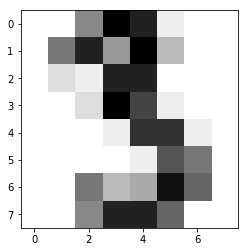

In [21]:
plt.imshow(digits.images[3], cmap = matplotlib.cm.binary)

In [22]:
len(digits.target)

1797

In [23]:
X_train,X_test,y_train,y_test=train_test_split(data,digits.target,test_size=0.3,shuffle=False)
len(X_train)

1257

In [24]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [25]:
liner_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])
liner_svm

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [26]:
liner_svm.fit(X_train,y_train)

G:\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [27]:
y_predict = liner_svm.predict(X_test)

In [28]:
a = y_predict==y_test

In [29]:
conf_mx = confusion_matrix(y_test,y_predict)
conf_mx

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  0,  0,  3,  6],
       [ 4,  0, 47,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  0, 41,  0,  3,  0,  3,  4,  0],
       [ 0,  0,  0,  0, 53,  0,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 54,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 52,  0,  0,  1],
       [ 0,  0,  0,  0,  3,  0,  0, 48,  2,  1],
       [ 0,  4,  1,  2,  0,  0,  0,  1, 44,  0],
       [ 2,  2,  0,  1,  0,  0,  0,  1,  1, 48]], dtype=int64)

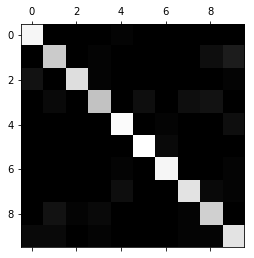

In [30]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [35]:
X_train_train,X_train_test,y_train_train,y_train_test = train_test_split(X_train,y_train)
best_score=0.0
for degree in [1,2]:
    for C in [1,10]:
        for coef in [0.001,0.01]:
            svm = Pipeline([
                ("scaler",StandardScaler()),
                ("svm_clf",SVC(kernel="rbf",coef0=coef,C=C,degree=degree)),
            ])
            svm.fit(X_train_train,y_train_train)
            svm_pre = svm.predict(X_train_test)
            score = accuracy_score(svm_pre,y_train_test)
            print("degree:{},C:{},coef:{},accuracy:{:.2f}".format(degree,C,coef,score))
            if(score>best_score):
                best_score = score
                best_parameters={"degree":degree,"C":C,"coef0":coef}
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

degree:1,C:1,coef:0.001,accuracy:0.98
degree:1,C:1,coef:0.01,accuracy:0.98
degree:1,C:10,coef:0.001,accuracy:0.98
degree:1,C:10,coef:0.01,accuracy:0.98
degree:2,C:1,coef:0.001,accuracy:0.98
degree:2,C:1,coef:0.01,accuracy:0.98
degree:2,C:10,coef:0.001,accuracy:0.98
degree:2,C:10,coef:0.01,accuracy:0.98
Best score on validation set:0.98
Best parameters:{'degree': 1, 'C': 1, 'coef0': 0.001}


In [36]:
poly_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=1,coef0=0.001,C=10)),
])
poly_svm

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, coef0=0.001, degree=1, kernel='poly'))])

In [37]:
poly_svm.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, coef0=0.001, degree=1, kernel='poly'))])

In [38]:
poly_predict = poly_svm.predict(X_test)

In [39]:
conf_mx_poly = confusion_matrix(y_test,poly_predict)
conf_mx_poly

array([[52,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  7,  0],
       [ 1,  0,  0,  0, 53,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 51,  1,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 49,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  2,  1, 50]], dtype=int64)

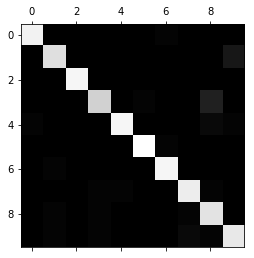

In [40]:
plt.matshow(conf_mx_poly,cmap=plt.cm.gray)
plt.show()

In [43]:
best_score=0.0
for gamma in [0.001,0.1,10]:
    for C in [1,10,100]:
        svm = Pipeline([
            ("scaler",StandardScaler()),
            ("svm_clf",SVC(kernel="rbf",gamma=gamma,C=C)),
        ])
        svm.fit(X_train_train,y_train_train)
        svm_pre = svm.predict(X_train_test)
        score = accuracy_score(svm_pre,y_train_test)
        print("gamma:{},C:{},accuracy:{:.2f}".format(gamma,C,score))
        if(score>best_score):
            best_score = score
            best_parameters={"gamma":gamma,"C":C}
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

gamma:0.001,C:1,accuracy:0.94
gamma:0.001,C:10,accuracy:0.98
gamma:0.001,C:100,accuracy:0.98
gamma:0.1,C:1,accuracy:0.95
gamma:0.1,C:10,accuracy:0.95
gamma:0.1,C:100,accuracy:0.95
gamma:10,C:1,accuracy:0.08
gamma:10,C:10,accuracy:0.08
gamma:10,C:100,accuracy:0.08
Best score on validation set:0.98
Best parameters:{'gamma': 0.001, 'C': 10}


In [44]:
rbf_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=0.001,C=100.0)),
])
rbf_svm

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100.0, gamma=0.001))])

In [45]:
rbf_svm.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100.0, gamma=0.001))])

In [46]:
rbf_predict = rbf_svm.predict(X_test)

In [47]:
rbf_predict

array([4, 0, 5, 3, 6, 9, 6, 4, 7, 5, 4, 4, 7, 2, 1, 2, 2, 5, 7, 9, 5, 4,
       8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       0, 5, 6, 7, 1, 9, 0, 1, 2, 3, 4, 5, 4, 7, 8, 9, 0, 9, 5, 5, 2, 5,
       0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2,
       6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 2, 0, 0,
       1, 7, 6, 3, 2, 1, 7, 4, 4, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8,
       4, 5, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 9, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 9, 5, 0, 9, 5, 2, 8, 2, 0, 0, 9, 7, 6, 3,
       2, 9, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9,
       6, 9, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 3, 0, 7,
       9, 8, 0, 1, 2, 3, 4, 5, 1, 8, 1, 9, 0, 1, 2,

In [48]:
conf_mx_rbf = confusion_matrix(y_test,rbf_predict)
conf_mx_rbf

array([[52,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 47,  0,  0,  1,  0,  0,  0,  0,  5],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  7,  0],
       [ 1,  0,  0,  0, 53,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  1,  1,  0,  2,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 51,  1,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 47,  0],
       [ 0,  1,  0,  1,  0,  2,  0,  1,  1, 49]], dtype=int64)

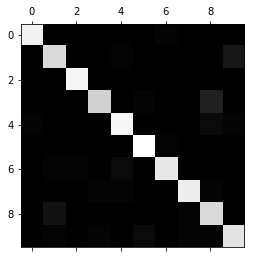

In [49]:
plt.matshow(conf_mx_rbf,cmap=plt.cm.gray)
plt.show()

In [50]:
print("Classification report for classifier %s:\n%s\n"
      % (liner_svm, metrics.classification_report(y_test, y_predict)))

Classification report for classifier Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))]):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.84      0.81      0.83        53
           2       0.98      0.89      0.93        53
           3       0.89      0.77      0.83        53
           4       0.91      0.93      0.92        57
           5       0.95      0.96      0.96        56
           6       0.95      0.96      0.95        54
           7       0.91      0.89      0.90        54
           8       0.81      0.85      0.83        52
           9       0.80      0.87      0.83        55

    accuracy                           0.89       540
   macro avg       0.89      0.89      0.89       540
weighted avg       0.89      0.89      0.89       540




In [51]:
print("Classification report for classifier %s:\n%s\n"
      % (poly_svm, metrics.classification_report(y_test, poly_predict)))

Classification report for classifier Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, coef0=0.001, degree=1, kernel='poly'))]):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.94      0.91      0.92        53
           2       1.00      1.00      1.00        53
           3       0.94      0.85      0.89        53
           4       0.98      0.93      0.95        57
           5       0.98      0.98      0.98        56
           6       0.96      0.98      0.97        54
           7       0.94      0.94      0.94        54
           8       0.82      0.94      0.87        52
           9       0.89      0.91      0.90        55

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540




In [52]:
print("Classification report for classifier %s:\n%s\n"
      % (rbf_svm, metrics.classification_report(y_test, rbf_predict)))

Classification report for classifier Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100.0, gamma=0.001))]):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.89      0.89      0.89        53
           2       0.98      1.00      0.99        53
           3       0.96      0.85      0.90        53
           4       0.93      0.93      0.93        57
           5       0.95      0.98      0.96        56
           6       0.96      0.93      0.94        54
           7       0.96      0.94      0.95        54
           8       0.81      0.90      0.85        52
           9       0.89      0.89      0.89        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540




In [69]:
import numpy as np
rbf_3to8 = np.where((rbf_predict==8)&(y_test==3))
rbf_3to8

(array([345, 348, 423, 469, 470, 473, 508], dtype=int64),)

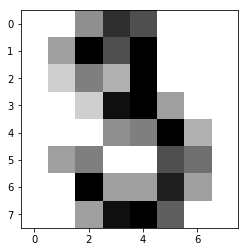

In [70]:
plt.imshow(digits.images[469], cmap = matplotlib.cm.binary)

In [71]:
rbf_predict[rbf_3to8]

array([8, 8, 8, 8, 8, 8, 8])